In [2]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz 
import graphviz 
import random

In [27]:
data = {
    "Usia" : [random.randint(18, 40) for _ in range(30)],
    "Pendapatan" : [random.randint(2000, 10000) for _ in range(30)],
    "Pekerjaan" :["Pegawai", "PNS", "Halo Dek", "Dosen", "Wirausaha",
                  "PNS", "Halo Dek", "Dosen", "Wirausaha", "Pegawai",
                  "Pegawai", "PNS", "Halo Dek", "Dosen", "Wirausaha",
                  "Wirausaha", "PNS", "Pegawai", "Dosen", "Halo Dek" ,
                  "Pegawai", "PNS", "Halo Dek", "Dosen", "Wirausaha",
                  "PNS", "Halo Dek", "Dosen", "Wirausaha", "Pegawai"],
    "Status" : ["Approved", "Declined", "Approved", "Declined","Approved",
                "Approved", "Declined", "Approved", "Declined","Approved",
                "Approved", "Declined", "Approved", "Declined","Approved",
                "Approved", "Declined", "Approved", "Declined","Approved",
                "Approved", "Declined", "Approved", "Declined","Approved",
                "Approved", "Declined", "Approved", "Declined","Approved" 
                ]
}
print(data)

{'Usia': [34, 29, 30, 32, 26, 22, 35, 38, 39, 33, 21, 29, 33, 31, 23, 35, 26, 20, 19, 22, 29, 28, 24, 30, 23, 34, 21, 22, 26, 21], 'Pendapatan': [7557, 6501, 8412, 5812, 9305, 6551, 6531, 8320, 4316, 6631, 5566, 2504, 3935, 3392, 9326, 8569, 9811, 8993, 3614, 4025, 4058, 5107, 5478, 6963, 9180, 6044, 9119, 2924, 5498, 9176], 'Pekerjaan': ['Pegawai', 'PNS', 'Halo Dek', 'Dosen', 'Wirausaha', 'PNS', 'Halo Dek', 'Dosen', 'Wirausaha', 'Pegawai', 'Pegawai', 'PNS', 'Halo Dek', 'Dosen', 'Wirausaha', 'Wirausaha', 'PNS', 'Pegawai', 'Dosen', 'Halo Dek', 'Pegawai', 'PNS', 'Halo Dek', 'Dosen', 'Wirausaha', 'PNS', 'Halo Dek', 'Dosen', 'Wirausaha', 'Pegawai'], 'Status': ['Approved', 'Declined', 'Approved', 'Declined', 'Approved', 'Approved', 'Declined', 'Approved', 'Declined', 'Approved', 'Approved', 'Declined', 'Approved', 'Declined', 'Approved', 'Approved', 'Declined', 'Approved', 'Declined', 'Approved', 'Approved', 'Declined', 'Approved', 'Declined', 'Approved', 'Approved', 'Declined', 'Approved',

In [28]:
df = pd.DataFrame(data)
df

,Usia,Pendapatan,Pekerjaan,Status
0,34,7557,Pegawai,Approved
1,29,6501,PNS,Declined
2,30,8412,Halo Dek,Approved
3,32,5812,Dosen,Declined
4,26,9305,Wirausaha,Approved
5,22,6551,PNS,Approved
6,35,6531,Halo Dek,Declined
7,38,8320,Dosen,Approved
8,39,4316,Wirausaha,Declined
9,33,6631,Pegawai,Approved


In [29]:
df_encoded = pd.get_dummies(df, columns=["Pekerjaan"])
df_encoded

,Usia,Pendapatan,Status,Pekerjaan_Dosen,Pekerjaan_Halo Dek,Pekerjaan_PNS,Pekerjaan_Pegawai,Pekerjaan_Wirausaha
0,34,7557,Approved,0,0,0,1,0
1,29,6501,Declined,0,0,1,0,0
2,30,8412,Approved,0,1,0,0,0
3,32,5812,Declined,1,0,0,0,0
4,26,9305,Approved,0,0,0,0,1
5,22,6551,Approved,0,0,1,0,0
6,35,6531,Declined,0,1,0,0,0
7,38,8320,Approved,1,0,0,0,0
8,39,4316,Declined,0,0,0,0,1
9,33,6631,Approved,0,0,0,1,0


In [32]:
x = df_encoded.drop('Status', axis=1)
y = df_encoded['Status']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [40]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [41]:
prediksi = model.predict(x_test)
akurasi = accuracy_score(y_test, prediksi)
print("Akurasi Naive Bayes", akurasi)

Akurasi Naive Bayes 0.6666666666666666


In [42]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
prediksi_DT = dt_model.predict(x_test)
akurasi_DT = accuracy_score(y_test, prediksi_DT)
print("Akurasi DT: ", akurasi_DT)

Akurasi DT:  0.5


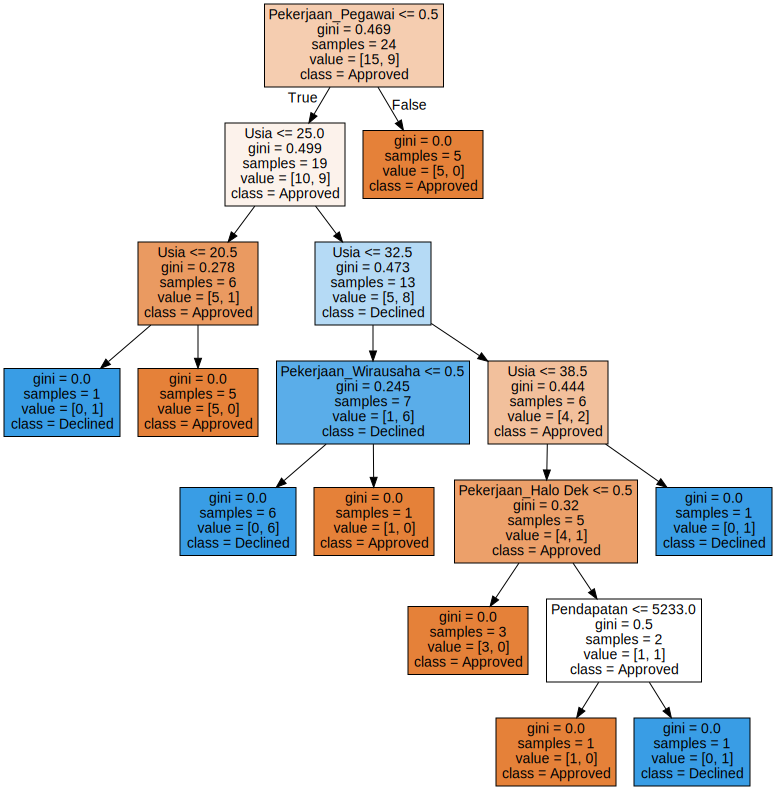

In [45]:
visualisasi = export_graphviz(dt_model, out_file=None,
                              feature_names = x.columns,
                              class_names = ['Approved', "Declined"],
                              filled=True)
graph = graphviz.Source(visualisasi) 
graph.render("Decision Tree")

graph